In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [5]:
encoding_dim = 32

In [6]:
input_img = Input(shape=(784,))

In [7]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [8]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [9]:
autoencoder = Model(input_img, decoded)

In [10]:
encoder = Model(input_img, encoded)

In [16]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 19ms/step - loss: 0.2453 - val_loss: 0.1657
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1499 - val_loss: 0.1372
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1332 - val_loss: 0.1253
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1226 - val_loss: 0.1172
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1161 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1124 - val_loss: 0.1093
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1094 - val_loss: 0.1072
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1071 - val_loss: 0.1050
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1051 - val_loss: 0.1029
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1035 - val_lo

313/313 [==============================] - 1s 2ms/step


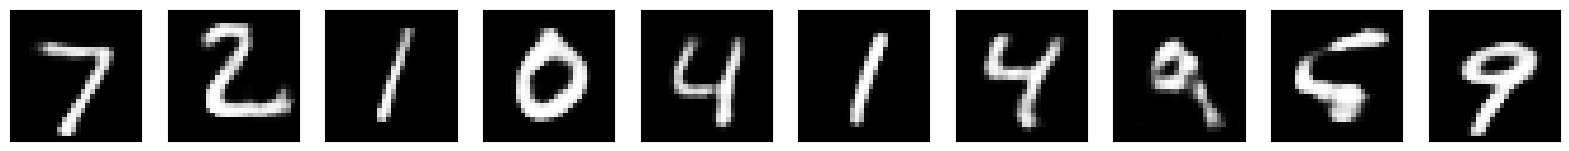

In [22]:
import matplotlib.pyplot as plt
# Use the encoder to transform the test set into the encoded space
encoded_imgs = encoder.predict(x_test)
# Use the decoder to generate new images from the encoded representations
generated_images = decoder.predict(encoded_imgs)
# Reshape and visualize the generated images
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(generated_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


In the above implementation, the autoencoder is trained on the MNIST dataset, which consists of handwritten digits from 0 to 9. The autoencoder learns to encode and decode representations of these digits during the training process. Therefore, the generated images produced by the decoder will likely resemble digits from the MNIST dataset.

###Observations:

1. The generated images likely resembles the digits present in the training dataset because the model has learned to encode and decode these specific patterns.

2. Not Completely New Images: Since the model is trained on a specific dataset, it may not be able to generate entirely new images that it has never seen before.

 The autoencoder is constrained by the patterns present in the MNIST dataset, and it can only generate variations or reconstructions of those patterns.


---



**Variational Autoencoders** (VAEs) explicitly model the distribution of the encoded representations and allows us to sample from this distribution to generate new images.

In a VAE, the encoder produces not only the mean but also the variance of the distribution for each dimension in the encoded space. This means that rather than providing a fixed point in the encoded space, VAEs model a probability distribution. Sampling from this distribution during the generation process allows the model to generate diverse and novel outputs.


- Latent Space Distribution: VAEs model the latent space as a probability distribution, typically a Gaussian distribution (normal distribution), where the mean and variance are learned during training.

- Reparameterization Trick: To enable backpropagation during training, a reparameterization trick is used.

 Instead of directly sampling from the distribution, the model samples from a standard Gaussian distribution and then scales and shifts the samples using the mean and variance predicted by the encoder.

- Sampling for Generation: During the generation process, we can sample from the learned distribution in the latent space to obtain different representations. This allows the generation of diverse and novel images by exploring different regions of the latent space.